## Ridge Regression
_________________________________

The penalized linear regression outperformed the other models, slightly. We chose the ridge model because it does not shrink coefficients all the way to zero, so we believed it may preserve some *possibly* meaningful patterns and perfrom better on the test set (Lasso shrunk all but two features to 0 and ElasticNet favored Lasso heavily and also shrunk all but about two coefficients to 0).


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()

In [13]:
# set seed for reproducibility (same one as training)
random_seed = 123
np.random.seed(random_seed)

# Best Ridge hyperparameter from training
best_alpha = 1555.6761439304755

# Ridge pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # scale features
    ('ridge', Ridge(alpha=best_alpha, random_state=random_seed))
])

# Fit on training data
ridge_pipeline.fit(X_train, y_train)

# Predict on test set
ridge_pred = ridge_pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression Test Set Evaluation (seed=123):")
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

Ridge Regression Test Set Evaluation (seed=123):
MSE: 6.928395446389564
RMSE: 2.632184538817437
R²: -0.03888095240760947


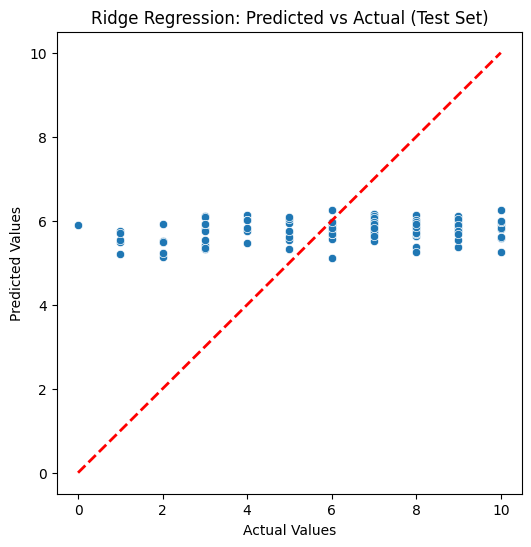

In [14]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=ridge_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45° line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Predicted vs Actual (Test Set)")
plt.show()

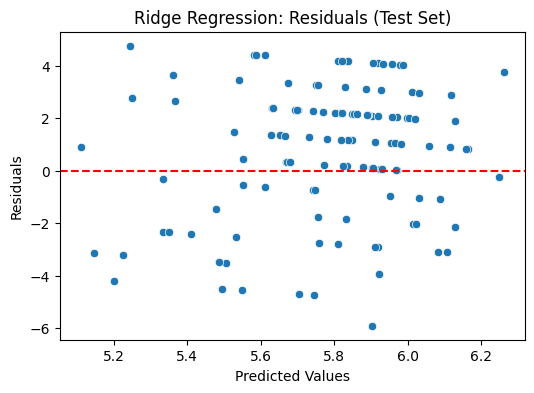

In [15]:
residuals = y_test - ridge_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=ridge_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Ridge Regression: Residuals (Test Set)")
plt.show()